# Plot ICESat-2 Data Alongside Sentinel-2

*The examples below show how to plot ICESat-2 signals of submerged "benches" at ice shelf fronts, which cause buoyant upward flexure at the front.*

This notebook uses the function ```plotIS2S2()```. 

Call it with the following arguments (bold ones are required):
- **```lat``` (required): latitude of your point of interest**
- **```lon``` (required): longitude of your point of interest**
- **```date``` (required): date in format 'YYYY-mm-dd'**
- **```rgt``` (required): the ICESat-2 track number**
- **```gtx``` (required): the ICESat-2 ground track (e.g. 'gt1l')**
- ```buffer_m```: the buffer in meters around the point of interest (default: 2500)
- ```ylim```: the y-axis limit of the plot (default: the matplotlib automatic limit)
- ```apply_geoid```: whether to apply geoid correction to photon heights (default: True)
- ```title```: the title for the plot (default: 'ICESat-2 ATL03 data')
- ```max_cloud_prob```: the maximum cloud probability within the area of interest in percent (default: 15)
- ```gamma_value```: the gamma value for image display (default: 1.0)
- ```inset```: whether to add inset map, so far either False or 'antarctica' (default: False)
- ```return_data```: whether to return the underlying ATL03 data and the imagery (default: False)
- ```re_download```: whether to re-download data that's already been downloaded (default: True)
- ```IS2dir```: the folder to which to save ATL03 granules (default: 'IS2data')
- ```imagery_filename```: the output path for the imagery (default: 'imagery/\<granule>_\<gtx>.tif')
- ```plot_filename```: the output path for the generated plot (default: 'plots/IS2_cycle\<cycle#\>\_RGT\<rgt>_\<gtx>\_\<date/time>\_\<beam_strength\>\_\<lon\>\_\<lat\>\_\<buffer_m\>m.jpg')

The function returns:
- **```figure```: matplotlib output figure** *(if ```return_data``` is set to ```False```)*
- ```(figure, atl03_dataframe, atl03_ancillary_data, imagery_rasterio_reader)``` *(if ```return_data``` is set to ```True```)*

In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from utils.S2 import plotIS2S2

Search parameters: {'short_name': 'ATL03', 'version': '006', 'temporal': '2020-11-18T00:00:00Z,2020-11-18T23:59:59Z', 'page_size': 100, 'page_num': 1, 'bounding_box': '95.5148059,-65.6312779,95.5451941,-65.6187221'}

Found 1 ATL03 version 006 granules over the search area between 2020-11-18 and 2020-11-18.
  ATL03_20201118081610_08420910_006_01.h5, 4840.87 MB
  --> There will be 1 total order(s) processed for our ATL03 request.

Order:  1
Requesting...
HTTP response from order response URL:  200
Downloading...
Data request 1 is complete.
  reading in IS2data/processed_ATL03_20201118081610_08420910_006_01_gt2l_0095.5300_-065.6250_700m.h5
  reading in beam: gt2l  --> done.
Looking for Sentinel-2 images from 2020-11-08T08:20:16 to 2020-11-28T08:20:16 --> there are 5 cloud-free images.
--> Closest cloud-free Sentinel-2 image:
    - product_id: S2B_MSIL2A_20201115T024559_N0214_R103_T46DFN_20201115T041509
    - time difference: -4 days, 18:26:15.308000
    - mean cloud probability: 5.5
--> D

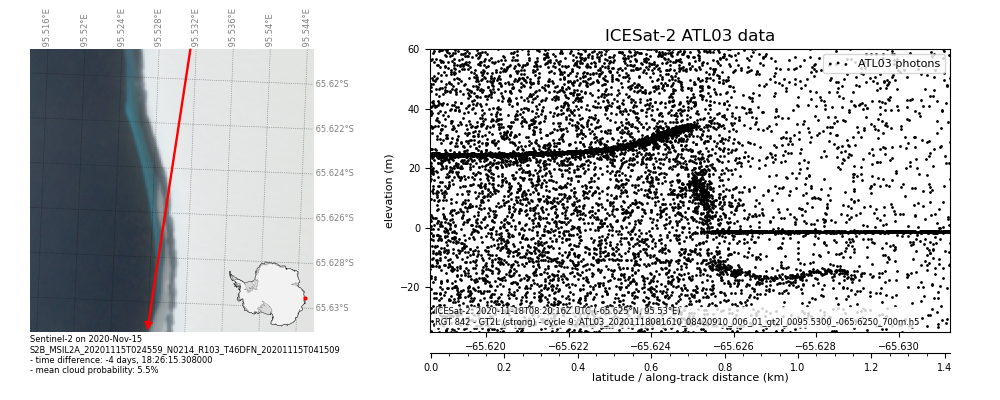

In [2]:
# shackleton, ~400m of bench along-track
kwargs = {
    'lon' : 95.53, 
    'lat' : -65.625, 
    'date' : '2020-11-18',
    'rgt' : 842, 
    'gtx' : 'gt2l', 
    'buffer_m' : 700, 
    'gamma_value' : 3.0,  
    'ylim' : (-35,60),
    'inset': 'antarctica',
    're_download': True # setting to True here to show sample output in rendered notebook
}
fig = plotIS2S2(**kwargs)

found already downloaded file: IS2data/processed_ATL03_20191204133404_10480512_006_01_gt1r_0095.5010_-065.8055_500m.h5
  reading in IS2data/processed_ATL03_20191204133404_10480512_006_01_gt1r_0095.5010_-065.8055_500m.h5
  reading in beam: gt1r  --> done.
--> Saved plot as plots/IS2_cycle05_RGT1048_GT1R_2019-12-04T13:37:34Z_strong_0095.5010_-065.8055_500m.jpg.


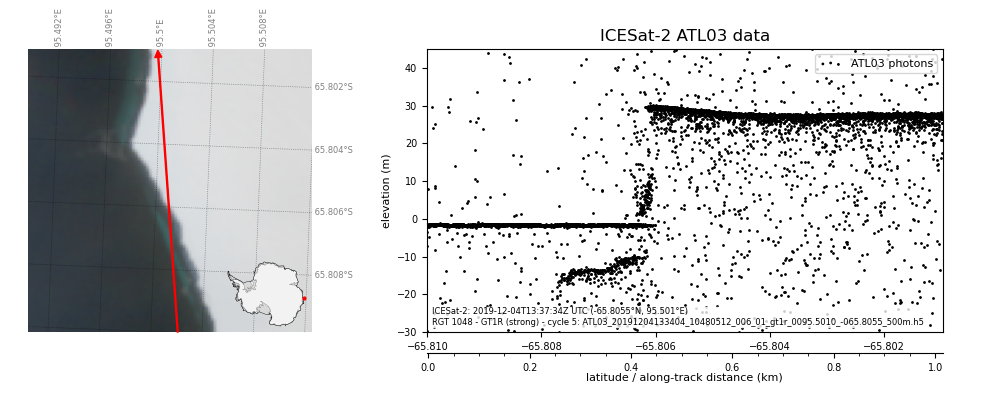

In [3]:
# shackleton, very strong bench signal (~150m along-track)
kwargs = {
    'lon' : 95.501, 
    'lat' : -65.8055, 
    'date' : '2019-12-04',
    'rgt' : 1048, 
    'gtx' : 'gt1r', 
    'buffer_m' : 500, 
    'gamma_value' : 3.0,
    'ylim' : (-30,45),
    'inset': 'antarctica',
    're_download': False
}
fig = plotIS2S2(**kwargs)

found already downloaded file: IS2data/processed_ATL03_20200101075253_00850612_006_01_gt1r_0164.7200_-075.3631_500m.h5
  reading in IS2data/processed_ATL03_20200101075253_00850612_006_01_gt1r_0164.7200_-075.3631_500m.h5
  reading in beam: gt1r  --> done.
--> Saved plot as plots/IS2_cycle06_RGT0085_GT1R_2020-01-01T07:53:51Z_strong_0164.7200_-075.3631_500m.jpg.


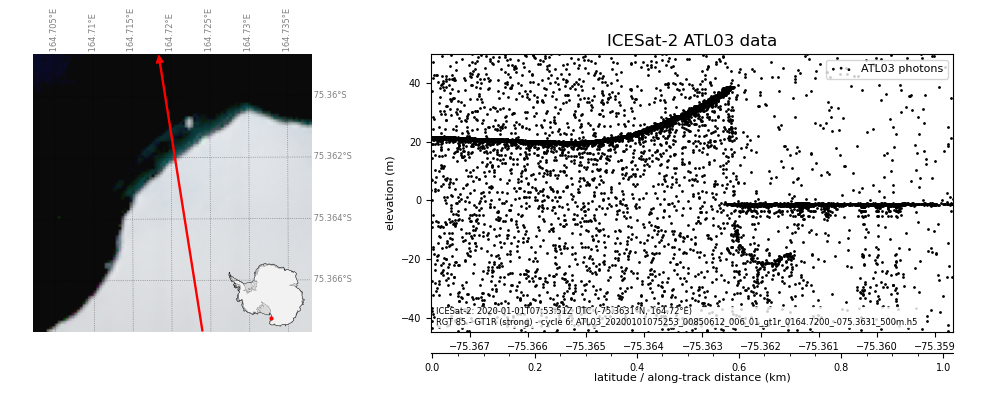

In [4]:
# drygalski ice tongue, nice rampart-moat (half of shelf freeboard, 20m), ~110m of bench 
kwargs = {
    'lon' : 164.7199980, 
    'lat' : -75.3631449, 
    'date' : '2020-01-01',
    'rgt' : 85, 
    'gtx' : 'gt1r', 
    'buffer_m' : 500, 
    'max_cloud_prob': 30, 
    'gamma_value' : 3.0,
    'ylim' : (-45,50),
    'inset': 'antarctica',
    're_download': False
}
fig = plotIS2S2(**kwargs)

found already downloaded file: IS2data/processed_ATL03_20221114213506_08421710_006_02_gt1r_0095.5735_-065.7276_1000m.h5
  reading in IS2data/processed_ATL03_20221114213506_08421710_006_02_gt1r_0095.5735_-065.7276_1000m.h5
  reading in beam: gt1r  --> done.
--> Saved plot as plots/IS2_cycle17_RGT0842_GT1R_2022-11-14T21:39:14Z_strong_0095.5735_-065.7276_1000m.jpg.


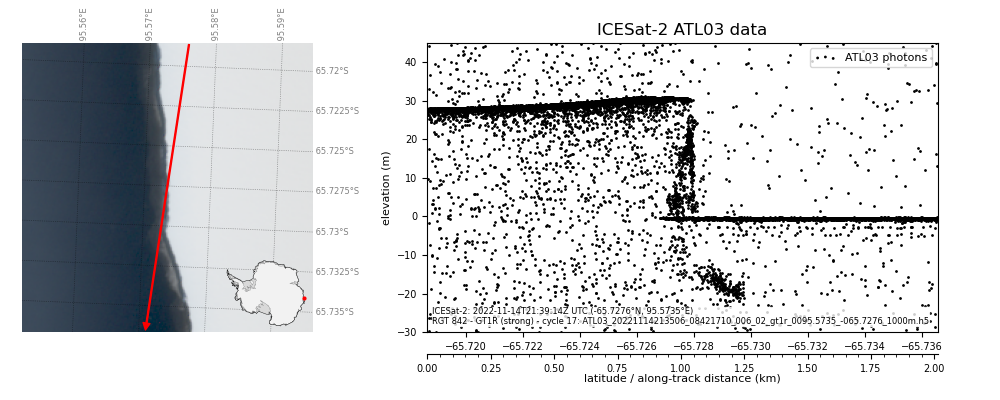

In [5]:
kwargs = {
    'lon' : 95.573454, 
    'lat' : -65.727596, 
    'date' : '2022-11-14',
    'rgt' : 842, 
    'gtx' : 'gt1r', 
    'buffer_m' : 1000, 
    'gamma_value' : 3.0,
    'ylim' : (-30,45),
    'inset': 'antarctica',
    're_download': False
}
fig = plotIS2S2(**kwargs)

found already downloaded file: IS2data/processed_ATL03_20191204133404_10480512_006_01_gt2r_0095.5258_-065.6259_3000m.h5
  reading in IS2data/processed_ATL03_20191204133404_10480512_006_01_gt2r_0095.5258_-065.6259_3000m.h5
  reading in beam: gt2r  --> done.
--> Saved plot as plots/IS2_cycle05_RGT1048_GT2R_2019-12-04T13:37:37Z_strong_0095.5258_-065.6259_3000m.jpg.


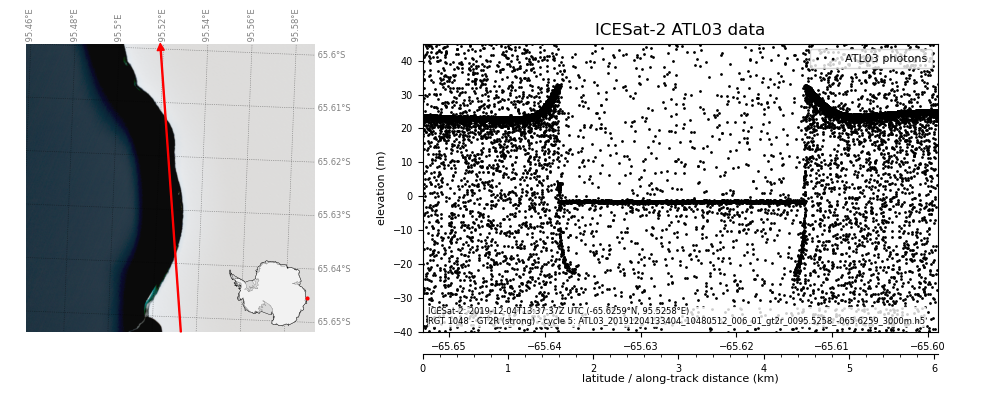

In [6]:
kwargs = {
    'lon' : 95.5257762, 
    'lat' : -65.6258957, 
    'date' : '2019-12-04',
    'rgt' : 1048, 
    'gtx' : 'gt2r', 
    'buffer_m' : 3000, 
    'gamma_value' : 3.0,  
    'ylim' : (-40,45),
    'inset': 'antarctica',
    're_download': False
}
fig = plotIS2S2(**kwargs)

found already downloaded file: IS2data/processed_ATL03_20201125223347_09580910_006_01_gt2l_-127.2570_-073.6685_1500m.h5
  reading in IS2data/processed_ATL03_20201125223347_09580910_006_01_gt2l_-127.2570_-073.6685_1500m.h5
  reading in beam: gt2l  --> done.
--> Saved plot as plots/IS2_cycle09_RGT0958_GT2L_2020-11-25T22:40:01Z_strong_-127.2570_-073.6685_1500m.jpg.


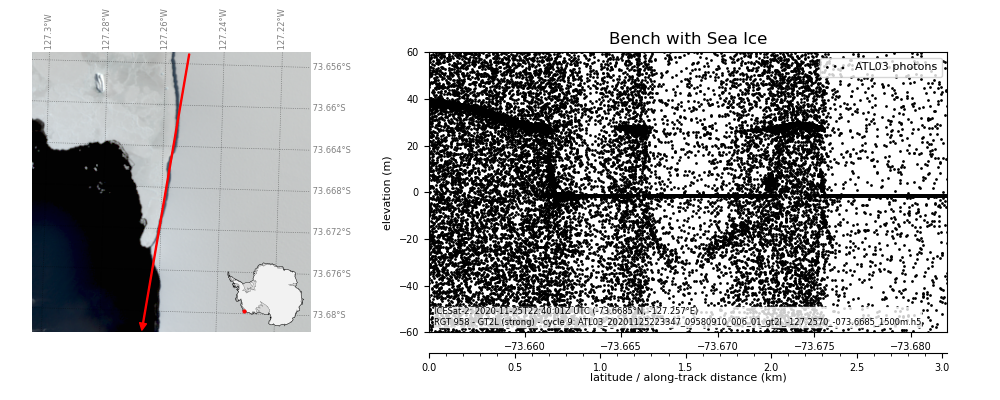

In [7]:
kwargs = {
    'lon' : -127.257, 
    'lat' : -73.66850, 
    'date' : '2020-11-25',
    'rgt' : 958, 
    'gtx' : 'gt2l', 
    'buffer_m' : 1500, 
    'ylim' : (-60,60),
    'title' : 'Bench with Sea Ice',
    'gamma_value' : 2.0,  
    'inset': 'antarctica',
    're_download': False
}
fig = plotIS2S2(**kwargs)